#Шаг 1: Создание датафреймов с данными из csv файлов для дальнейшей работы.

In [4]:
import pandas as pd

data_path = '/content/drive/MyDrive/ML/TUSUR_ML/#2_data_preparation/data/'

df = pd.read_csv(data_path + 'orders.csv', index_col = 0)
df.index.names = ['']
products_df = pd.read_csv(data_path + 'products.csv')
regions_df = pd.read_csv(data_path + 'regions.csv')
stores_df = pd.read_csv(data_path + 'stores.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Шаг 2:
Проверка типов данных и наличия NаN-значений в основном датафрейме


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_id             20000 non-null  int64  
 1   order_id             20000 non-null  int64  
 2   product_id           20000 non-null  int64  
 3   price                20000 non-null  float64
 4   profit               17911 non-null  float64
 5   delivery_distance    20000 non-null  int64  
 6   date_create          19986 non-null  object 
 7   order_start_prepare  18010 non-null  object 
 8   planned_prep_time    20000 non-null  float64
 9   order_ready          17999 non-null  object 
 10  order_pickup         20000 non-null  object 
 11  region_id            20000 non-null  int64  
 12  status_id            20000 non-null  object 
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB


#Шаг 3:
Необходимо преобразовать колонки *order_start_prepare* и *order_ready* и остальные, содержащие дату и время в формат datetime.

In [7]:
df['order_start_prepare'] = pd.to_datetime(df['order_start_prepare'])
# некоторые значения в колонке имеют формат %Y-%m-%d %H:%M, для них уставим значение секунд 00
df['date_create'] = df['date_create'].apply(lambda x: x if pd.isnull(x) else (x if len(x) == 19 else x + ':00'))
df['date_create'] = pd.to_datetime(df['date_create'])
df['order_ready'] = pd.to_datetime(df['order_ready'])
df['order_pickup'] = pd.to_datetime(df['order_pickup'], format='%d-%m-%Y %H:%M:%S')

df['order_ready'] = df['order_ready'].astype('datetime64[ns]')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   store_id             20000 non-null  int64         
 1   order_id             20000 non-null  int64         
 2   product_id           20000 non-null  int64         
 3   price                20000 non-null  float64       
 4   profit               17911 non-null  float64       
 5   delivery_distance    20000 non-null  int64         
 6   date_create          19986 non-null  datetime64[ns]
 7   order_start_prepare  18010 non-null  datetime64[ns]
 8   planned_prep_time    20000 non-null  float64       
 9   order_ready          17999 non-null  datetime64[ns]
 10  order_pickup         20000 non-null  datetime64[ns]
 11  region_id            20000 non-null  int64         
 12  status_id            20000 non-null  object        
dtypes: datetime64[ns](4), float64(3), in

#Шаг 4:
Подсчёт количества пропусков

In [8]:
df_with_empty_strings = df[(df == '').any(axis=1)]
df_with_spases = df[(df == ' ').any(axis=1)]
print('Количество пустых строк:', df_with_empty_strings.count().sum())
print('Количество строк с пробелами:', df_with_spases.count().sum())
print('Общее количествоо пропусков:', df.isna().sum().sum())
df.isna().sum()

Количество пустых строк: 0
Количество строк с пробелами: 0
Общее количествоо пропусков: 6094


,0
store_id,0
order_id,0
product_id,0
price,0
profit,2089
delivery_distance,0
date_create,14
order_start_prepare,1990
planned_prep_time,0
order_ready,2001


Итого 6094 пропусков в столбцах *profit* (2089), *date_create* (14), *order_start_prepare* (1990), *order_ready* (2001). Большая часть пропусков приходится на столбцы формата datetime.

#Шаг 5:
Анализ пропусков: построение тепловой карты корреляции пропущенных значений.

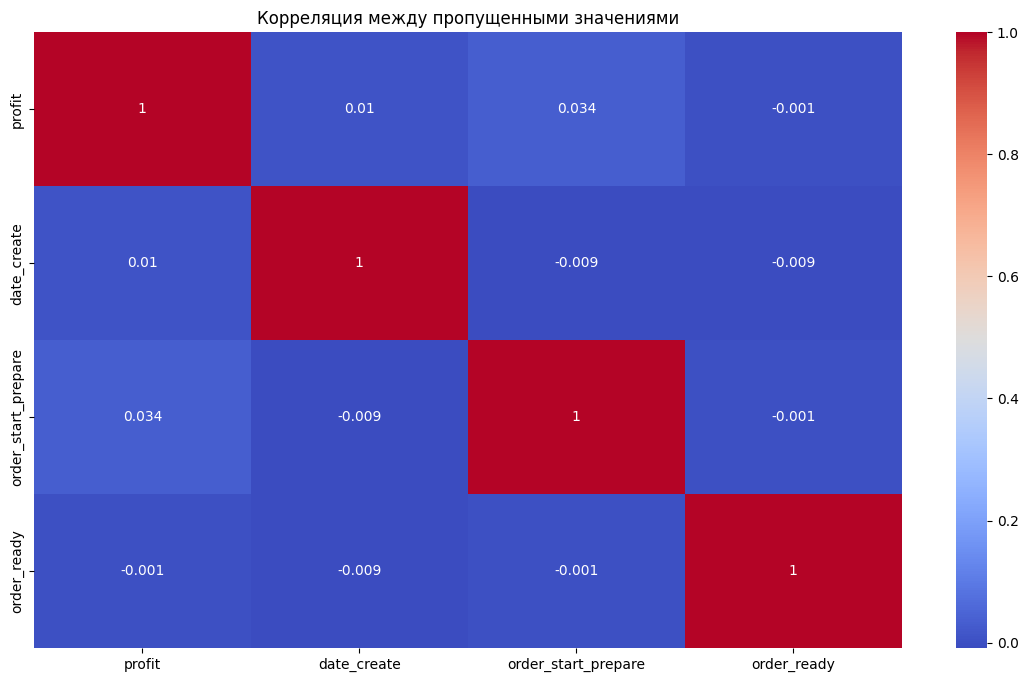

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Постоение корреляции пропусков в столбцах, имеющих пропуски
nan_df = df[df.columns[df.isna().any()]]
nan_indicators = nan_df.isna().astype(int)
nan_corr = round(nan_indicators.corr(), 3)

# Отображение корреляции на тепловой карте
plt.figure(figsize=(14, 8))
sns.heatmap(nan_corr, annot=True, cmap='coolwarm')

plt.title('Корреляция между пропущенными значениями')
plt.show()

Корреляции между пропусками нет.

#Шаг 6:
Построение графиков для всех колонок основного датасета

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   store_id             20000 non-null  int64         
 1   order_id             20000 non-null  int64         
 2   product_id           20000 non-null  int64         
 3   price                20000 non-null  float64       
 4   profit               17911 non-null  float64       
 5   delivery_distance    20000 non-null  int64         
 6   date_create          19986 non-null  datetime64[ns]
 7   order_start_prepare  18010 non-null  datetime64[ns]
 8   planned_prep_time    20000 non-null  float64       
 9   order_ready          17999 non-null  datetime64[ns]
 10  order_pickup         20000 non-null  datetime64[ns]
 11  region_id            20000 non-null  int64         
 12  status_id            20000 non-null  object        
dtypes: datetime64[ns](4), float64(3), in

In [11]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

num_df = df[['price', 'profit', 'delivery_distance', 'planned_prep_time']]
cat_df = df.drop(columns = num_df.columns)

# гистограммы для категориальных данных
fig = make_subplots(rows = len(cat_df.columns),
                    cols=1,
                    subplot_titles = cat_df.columns.tolist())
row = 1
for col in cat_df.columns:
    fig.add_trace(go.Histogram(x=cat_df[col], name=col), row=row, col=1)
    row += 1

fig.update_layout(height = 400 * len(cat_df.columns),
                  showlegend = False,
                  title_text = 'Гистограммы для категориальных признаков',
                  title_x=0.5)
fig.show()

# графики для числовых данных
plt.figure(figsize=(30, 15))
i = 1
for col in num_df.columns:
  plt.subplot(2,2,i)
  sns.kdeplot(num_df[col], fill=True)
  plt.title(num_df[col].name)
  plt.ylabel('Плотность')
  i += 1

plt.suptitle('Графики для числовых признаков')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#Шаг 7:
Избавление от пропусков. Построение матрицы корреляции позволит выявить зависимости между признаками с пропусками и без:


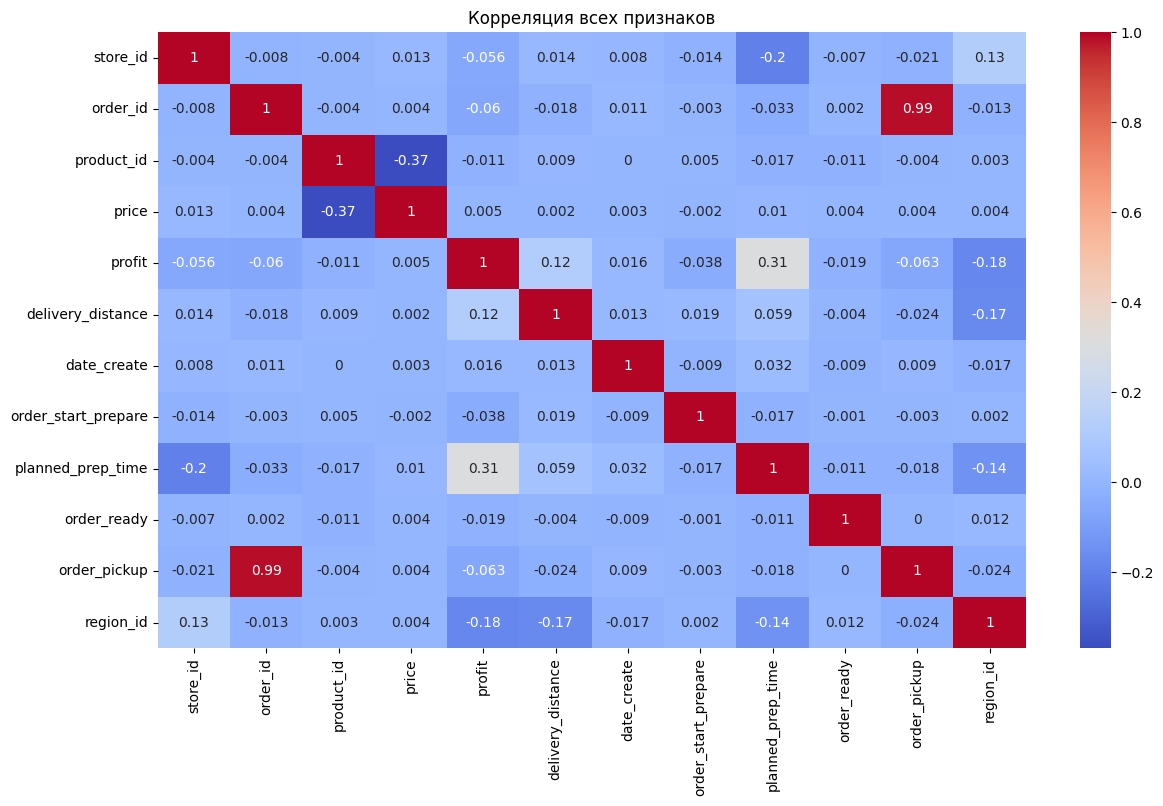

In [12]:
df_corr = round(df.drop('status_id', axis=1).corr(), 3) # опустим status_id, ведь гистограмма показала, что 99,8% записей имеют одно значение

plt.figure(figsize=(14, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

plt.title('Корреляция всех признаков')
plt.show()

Матрица корреляций не выразила явной зависимости между признаками с пропусками и без, однако мы все же можем заполнить некоторые пропуски на основе значений из других столбцов

Начнем с *date_create*:

In [13]:
na_date_create = df[df['date_create'].isna()]
na_date_create

,store_id,order_id,product_id,price,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id
,,,,,,,,,,,,,
3752,8367,20557147,66,13.44,17.6960,4893,NaT,2024-09-05 01:35:38,0.0,2024-09-05 01:49:44,2024-09-05 02:17:44,707,F
8051,6853,20551545,19,27.47,43.4500,2643,NaT,2024-09-04 18:23:50,15.0,2024-09-04 18:38:34,2024-09-04 19:06:34,709,F
11266,9383,20547365,25,194.37,15.1680,4139,NaT,2024-09-04 13:03:55,30.0,2024-09-04 13:27:11,2024-09-04 13:55:11,695,F
11267,9383,20547365,19,27.47,15.1680,4139,NaT,2024-09-04 13:03:55,30.0,2024-09-04 13:27:11,2024-09-04 13:55:11,695,F
12108,4564,20546315,34,2.77,28.1635,4357,NaT,2024-09-04 12:48:05,0.0,2024-09-04 12:24:47,2024-09-04 12:52:47,707,F
12109,4564,20546315,6,7.56,28.1635,4357,NaT,2024-09-04 12:48:05,0.0,2024-09-04 12:24:47,2024-09-04 12:52:47,707,F
12276,5985,20546071,59,10.65,NaN,2814,NaT,2024-09-04 12:02:32,0.0,2024-09-04 12:30:57,2024-09-04 12:58:57,707,F
12277,5985,20546071,41,7.04,NaN,2814,NaT,2024-09-04 12:02:32,0.0,2024-09-04 12:30:57,2024-09-04 12:58:57,707,F
12278,5985,20546071,71,41.64,NaN,2814,NaT,2024-09-04 12:02:32,0.0,2024-09-04 12:30:57,2024-09-04 12:58:57,707,F


Поскольку во всех строках с пустым *date_create* присутствует значение признака *order_start_prepare*, то есть возможность восстановить значения *date_create* по средней разнице между *date_create* и *order_start_prepare*.

Проверка гипотезы: задержка от принятия заказа до начале его приготовления зависит от store_id или других признаков. Проверка:

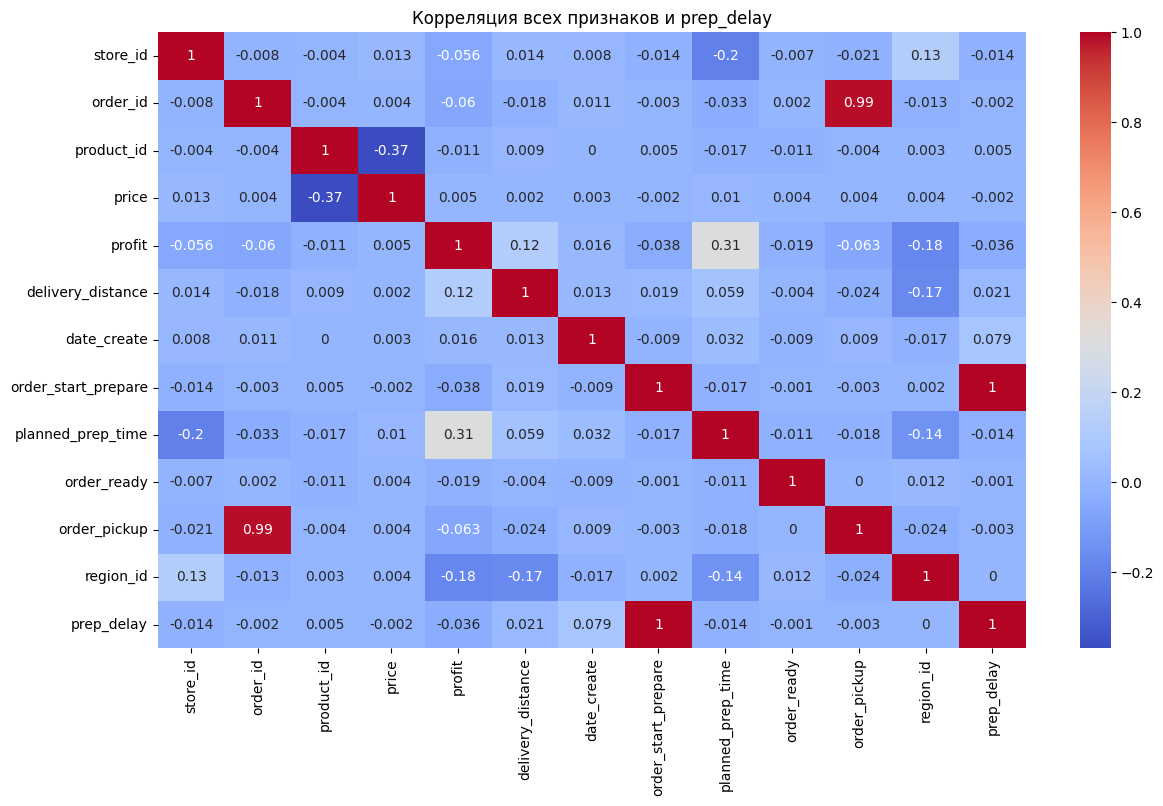

In [14]:
# создаём новый признак prep_delay и сторим матрицу корреляции
df['prep_delay'] = df['order_start_prepare'] - df['date_create']
df_corr = round(df.drop('status_id', axis=1).corr(), 3) # опустим status_id, ведь гистограмма показала, что 99,8% записей имеют одно значение

plt.figure(figsize=(14, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

plt.title('Корреляция всех признаков и prep_delay')
plt.show()

Матрица корреляции показала, что *prep_delay* почти не зависит ни от каких признаков кроме *order_start_prepare* и *date_create*. Следовательно, пропуски заполним на основании общего среднего значениия *prep_delay*. Для начала исследуем *prep_delay*.

In [15]:
df['prep_delay'].describe()

,prep_delay
count,17996
mean,0 days 00:02:24.271615914
std,0 days 00:06:34.862599077
min,0 days 00:00:02
25%,0 days 00:00:09
50%,0 days 00:00:18
75%,0 days 00:01:17
max,0 days 01:44:39


In [16]:
fig = px.histogram(df, x='prep_delay')
fig.update_layout(xaxis_title='prep_delay', yaxis_title='время', title='prep_delay', title_x=0.5)
fig.show()

На гисторамме имеется существенный хвост, поэтому при расчете средней задержки  нужно удалить выбросы :

In [17]:
def get_outliers_idx (df, feature):
  IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
  low = df[feature].quantile(0.25) - (IQR * 1.5)
  up = df[feature].quantile(0.75) + (IQR * 1.5)
  borders = (low, up)
  outliers = pd.concat([df[feature] < low, df[feature] > up], axis=1)
  outliers_index = outliers.any(axis=1)
  return outliers_index

df.loc[:, 'date_create'] = df['date_create'].fillna(df['order_start_prepare'] - df['prep_delay'][~get_outliers_idx(df, 'prep_delay')].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   store_id             20000 non-null  int64          
 1   order_id             20000 non-null  int64          
 2   product_id           20000 non-null  int64          
 3   price                20000 non-null  float64        
 4   profit               17911 non-null  float64        
 5   delivery_distance    20000 non-null  int64          
 6   date_create          20000 non-null  datetime64[ns] 
 7   order_start_prepare  18010 non-null  datetime64[ns] 
 8   planned_prep_time    20000 non-null  float64        
 9   order_ready          17999 non-null  datetime64[ns] 
 10  order_pickup         20000 non-null  datetime64[ns] 
 11  region_id            20000 non-null  int64          
 12  status_id            20000 non-null  object         
 13  prep_delay           

Теперь признак *date_create* не имеет пропусков. *order_start_prepare* заполним аналогично:

In [18]:
df.loc[:, 'order_start_prepare'] = df['order_start_prepare'].fillna(df['date_create'] + df['prep_delay'][~get_outliers_idx(df, 'prep_delay')].mean())
df.drop('prep_delay', axis = True, inplace = True) # удаляем за ненадобностью
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   store_id             20000 non-null  int64         
 1   order_id             20000 non-null  int64         
 2   product_id           20000 non-null  int64         
 3   price                20000 non-null  float64       
 4   profit               17911 non-null  float64       
 5   delivery_distance    20000 non-null  int64         
 6   date_create          20000 non-null  datetime64[ns]
 7   order_start_prepare  20000 non-null  datetime64[ns]
 8   planned_prep_time    20000 non-null  float64       
 9   order_ready          17999 non-null  datetime64[ns]
 10  order_pickup         20000 non-null  datetime64[ns]
 11  region_id            20000 non-null  int64         
 12  status_id            20000 non-null  object        
dtypes: datetime64[ns](4), float64(3), in

Для заполнения пропусков *order_ready* создадим новые признаки - *fact_prep_time* указывающий на время приготовления заказа и *prep_time_mistake* указывающий на разницу между ожидаемым и фактическим временем приготовлением.

In [19]:
df['fact_prep_time'] = df['order_ready'] - df['order_start_prepare']
# отсекаем случаи, когда время конца приготовления меньше чем начала приготовления и избавляемся от иных выбросов
no_outliers = df[df['fact_prep_time'] > pd.Timedelta(0)][~get_outliers_idx(df, 'fact_prep_time')]
no_outliers['prep_time_mistake'] = pd.to_timedelta(no_outliers['planned_prep_time'], unit='m') - no_outliers['fact_prep_time']

df.loc[:, 'order_ready'] = df['order_ready'].fillna(df['order_start_prepare']
                                                    + pd.to_timedelta(df['planned_prep_time'], unit='m')
                                                    + no_outliers['prep_time_mistake'][~get_outliers_idx(no_outliers, 'prep_time_mistake')].mean())

df.drop('fact_prep_time', axis = True, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   store_id             20000 non-null  int64         
 1   order_id             20000 non-null  int64         
 2   product_id           20000 non-null  int64         
 3   price                20000 non-null  float64       
 4   profit               17911 non-null  float64       
 5   delivery_distance    20000 non-null  int64         
 6   date_create          20000 non-null  datetime64[ns]
 7   order_start_prepare  20000 non-null  datetime64[ns]
 8   planned_prep_time    20000 non-null  float64       
 9   order_ready          20000 non-null  datetime64[ns]
 10  order_pickup         20000 non-null  datetime64[ns]
 11  region_id            20000 non-null  int64         
 12  status_id            20000 non-null  object        
dtypes: datetime64[ns](4), float64(3), in

<ipython-input-19-42e2de78a595>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Осталось удаление пропусков признака *profit*. Пропусков достаточно много, признак не коррелирует ни с одним другим за исключением слабой корреляции с *planned_prep_time*, поэтому тут уместно множественное восстановление.

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Создание экземпляра IterativeImputer
imputer = IterativeImputer(random_state=0)

# Фиксируем записи с NaN-значениями в цене
nan_price_indexes = df[df['profit'].isnull()].index.tolist()

# Преобразование данных с использованием IterativeImputer
imputed_data = imputer.fit_transform(df['profit'].to_numpy().reshape(-1, 1))

# Замена NaN значений в DataFrame
df['profit'] = imputed_data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   store_id             20000 non-null  int64         
 1   order_id             20000 non-null  int64         
 2   product_id           20000 non-null  int64         
 3   price                20000 non-null  float64       
 4   profit               20000 non-null  float64       
 5   delivery_distance    20000 non-null  int64         
 6   date_create          20000 non-null  datetime64[ns]
 7   order_start_prepare  20000 non-null  datetime64[ns]
 8   planned_prep_time    20000 non-null  float64       
 9   order_ready          20000 non-null  datetime64[ns]
 10  order_pickup         20000 non-null  datetime64[ns]
 11  region_id            20000 non-null  int64         
 12  status_id            20000 non-null  object        
dtypes: datetime64[ns](4), float64(3), in

#Шаг 8:
Избавление от аномалий. Для начала избавимся от аномалий, выявленных в процессе удаление пропусков:

*   Заказы с нулевым планируемым временем выполнения.
*   Заказы, были готовы раньше, чем чем их начали готовить.

А так же возможные случаи, когда заказ был получен до его приготовления и когда заказ начали готовить до его создания.



In [21]:
df = df[df['planned_prep_time'] > 0]
df = df[df['order_start_prepare'] <= df['order_ready']]
df = df[df['order_ready'] <= df['order_pickup']]
df = df[df['date_create'] <= df['order_start_prepare']]
df.shape

(19903, 13)

Путем построения ящиков с усами попробуем выявить выбросы у количкественных переменных.

In [22]:
fig = px.box(df, y='price')
fig.update_layout(title='price')
fig.show()

fig = px.box(df, y='profit')
fig.update_layout(title ='profit')
fig.show()

fig = px.box(df, y='delivery_distance')
fig.update_layout(title = 'delivery_distance')
fig.show()

fig = px.box(df, y='planned_prep_time')
fig.update_layout(yaxis_title= 'planned_prep_time')
fig.show()

Судя по точкам за пределами усов, все 4 признака имеют выбросы. С помощью ранее иницализированной функции поиска индексов строк с выбросами заменяем значения на моду по каждому признаку.

In [23]:

df.loc[get_outliers_idx(df, 'price'), 'price'] = df['price'].mode()[0]
df.loc[get_outliers_idx(df, 'profit'), 'profit'] = df['profit'].mode()[0]
df.loc[get_outliers_idx(df, 'delivery_distance'), 'delivery_distance'] = df['delivery_distance'].mode()[0]
df.loc[get_outliers_idx(df, 'planned_prep_time'), 'planned_prep_time'] = df['planned_prep_time'].mode()[0]

In [24]:
fig = px.box(df, y='price')
fig.update_layout(title='price')
fig.show()

fig = px.box(df, y='profit')
fig.update_layout(title ='profit')
fig.show()

fig = px.box(df, y='delivery_distance')
fig.update_layout(title = 'delivery_distance')
fig.show()

fig = px.box(df, y='planned_prep_time')
fig.update_layout(yaxis_title= 'planned_prep_time')
fig.show()

В *profit* и *delivery_distance* остались точки за пределами усов,однако в случае с *profit* максимальное значение отличается от наблюдаемого максимума всего на 15%, а отклонение в *delivery_distance* составляет около 7%. Будем считать эти показатели приемлемыми и перейдем к следующему шагу.

#Шаг 9:
*  Создание колонок *store_name*, *product_name* и *region_name*, заполнить их данными из соответсвующих датафреймов.
*   Создание столбца *items_count* содержащую количество продуктов в заказе.
*   Создание столбца *order_price* содержащую сумму стоимостей всех товаров в заказе и удаление *price*






In [25]:
stores_map = stores_df.set_index('store_id')['store_name'].to_dict()
df['store_name'] = df['store_id'].map(stores_map)

products_map = products_df.set_index('product_id')['product_name'].to_dict()
df['product_name'] = df['product_id'].map(products_map)

regions_map = regions_df.set_index('region_id')['delivery_region_name'].to_dict()
df['region_name'] = df['region_id'].map(regions_map)

df['items_count'] = df.groupby('date_create')['product_name'].transform('count')
df['order_price'] = df.groupby('date_create')['price'].transform('sum')
df = df.drop('price', axis=1)

df.head(5)

,store_id,order_id,product_id,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id,store_name,product_name,region_name,items_count,order_price
,,,,,,,,,,,,,,,,,
0,5014,20562761,41,45.504,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,2024-09-05 16:00:00,683,F,KFC на Пушкинской,Nachos,Sovetsky District,2,30.49
1,5014,20562761,31,45.504,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,2024-09-05 16:00:00,683,F,KFC на Пушкинской,Curry,Sovetsky District,2,30.49
2,3856,20562753,7,30.336,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,2024-09-05 16:03:50,683,F,NaN,Soup,Sovetsky District,2,60.21
3,3856,20562753,4,30.336,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,2024-09-05 16:03:50,683,F,NaN,Salad,Sovetsky District,2,60.21
4,10825,20562723,12,43.608,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,2024-09-05 16:06:38,683,F,NaN,Sushi,Sovetsky District,1,8.27


#Шаг 10:
Построение гистограммы для *product_name*.

In [26]:
fig = px.histogram(df, x = 'product_name')
fig.update_layout(xaxis_title = 'Название продукта', title = 'Распределение заказов по продуктам', title_x = 0.5)
fig.show()

 Распределение продуктов равномерное, значит, информация о них не имеет ценности. Поэтому мы можем удалить столбцы *product_name* и *product_id*, а так же удалить дубликаты записей об одном и том же заказе:

In [27]:
df.drop(['product_name', 'product_id'], axis = True, inplace = True)
df = df.drop_duplicates(subset='order_id', keep='first')
df = df.reset_index(drop=True)

df.head(10)

,store_id,order_id,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id,store_name,region_name,items_count,order_price
0,5014,20562761,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33.000000000,15.0,2024-09-05 15:32:00,2024-09-05 16:00:00,683,F,KFC на Пушкинской,Sovetsky District,2,30.49
1,3856,20562753,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19.000000000,10.0,2024-09-05 15:35:50,2024-09-05 16:03:50,683,F,NaN,Sovetsky District,2,60.21
2,10825,20562723,43.6080,459,2024-09-05 15:23:32,2024-09-05 15:23:44.000000000,20.0,2024-09-05 15:38:38,2024-09-05 16:06:38,683,F,NaN,Sovetsky District,1,8.27
3,5640,20562673,32.8640,2611,2024-09-05 15:19:00,2024-09-05 15:19:05.000000000,20.0,2024-09-05 15:35:25,2024-09-05 16:03:25,709,F,NaN,Vostochny District,2,24.68
4,7283,20562665,11.0600,1041,2024-09-05 15:18:39,2024-09-05 15:19:09.293065910,15.0,2024-09-05 15:35:33,2024-09-05 16:03:33,707,F,NaN,Kirovsky District,1,14.02
5,8535,20562639,11.3128,1749,2024-09-05 15:16:47,2024-09-05 15:16:52.000000000,10.0,2024-09-05 15:20:15,2024-09-05 15:48:15,685,F,NaN,Pervomaisky District,5,80.09
6,11449,20562617,4.4240,1040,2024-09-05 15:14:24,2024-09-05 15:14:35.000000000,20.0,2024-09-05 15:32:22,2024-09-05 16:00:22,695,F,NaN,Severny District,1,8.27
7,5014,20562585,49.7700,536,2024-09-05 15:11:38,2024-09-05 15:11:49.000000000,15.0,2024-09-05 15:25:54,2024-09-05 15:53:54,683,F,KFC на Пушкинской,Sovetsky District,3,27.70
8,10489,20562577,27.6500,314,2024-09-05 15:11:58,2024-09-05 15:12:07.000000000,20.0,2024-09-05 15:29:10,2024-09-05 15:57:10,683,F,KFC на Тверской,Sovetsky District,2,4.33
9,10295,20562575,8.9270,336,2024-09-05 15:11:21,2024-09-05 15:11:35.000000000,15.0,2024-09-05 15:17:37,2024-09-05 15:45:37,683,F,NaN,Sovetsky District,1,51.94


#Шаг 11:
Вынесение дня недели, часов и минут из *order_start_prepare* в отдельные столбцы.

In [28]:
df['day_of_week'] = df['order_start_prepare'].dt.dayofweek
df['hour_start'] = df['order_start_prepare'].dt.hour
df['minutes_start'] = df['order_start_prepare'].dt.minute

df.head(5)

,store_id,order_id,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id,store_name,region_name,items_count,order_price,day_of_week,hour_start,minutes_start
0,5014,20562761,45.504,2205,2024-09-05 15:25:25,2024-09-05 15:25:33.000000000,15.0,2024-09-05 15:32:00,2024-09-05 16:00:00,683,F,KFC на Пушкинской,Sovetsky District,2,30.49,3,15,25
1,3856,20562753,30.336,1368,2024-09-05 15:25:12,2024-09-05 15:25:19.000000000,10.0,2024-09-05 15:35:50,2024-09-05 16:03:50,683,F,NaN,Sovetsky District,2,60.21,3,15,25
2,10825,20562723,43.608,459,2024-09-05 15:23:32,2024-09-05 15:23:44.000000000,20.0,2024-09-05 15:38:38,2024-09-05 16:06:38,683,F,NaN,Sovetsky District,1,8.27,3,15,23
3,5640,20562673,32.864,2611,2024-09-05 15:19:00,2024-09-05 15:19:05.000000000,20.0,2024-09-05 15:35:25,2024-09-05 16:03:25,709,F,NaN,Vostochny District,2,24.68,3,15,19
4,7283,20562665,11.060,1041,2024-09-05 15:18:39,2024-09-05 15:19:09.293065910,15.0,2024-09-05 15:35:33,2024-09-05 16:03:33,707,F,NaN,Kirovsky District,1,14.02,3,15,19


#Шаг 12:
Анализ одной переменной.

In [29]:
df.describe()

,store_id,order_id,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,items_count,order_price,day_of_week,hour_start,minutes_start
count,7787.000000,7.787000e+03,7787.000000,7787.000000,7787,7787,7787.000000,7787,7787,7787.000000,7787.000000,7787.000000,7787.000000,7787.000000,7787.000000
mean,6868.725954,2.054911e+07,39.246867,4057.079620,2024-09-04 13:40:44.214218752,2024-09-04 13:42:47.779569408,22.643380,2024-09-04 14:04:15.830963456,2024-09-04 14:31:47.752793088,691.133813,2.779119,48.506136,1.921536,15.100039,29.289714
min,3053.000000,2.053583e+07,0.979600,6.000000,2024-09-03 15:01:24,2024-09-03 15:02:04,5.000000,2024-09-03 15:10:42,2024-09-03 15:38:42,683.000000,1.000000,1.560000,1.000000,0.000000,0.000000
25%,4031.000000,2.054234e+07,16.590000,2178.000000,2024-09-03 22:12:27,2024-09-03 22:15:05,20.000000,2024-09-03 22:33:57,2024-09-03 23:01:15,683.000000,2.000000,21.210000,1.000000,12.000000,14.000000
50%,6299.000000,2.054906e+07,34.760000,3609.000000,2024-09-04 14:27:25,2024-09-04 14:28:53,20.000000,2024-09-04 14:50:35.083525888,2024-09-04 15:17:23,685.000000,2.000000,40.390000,2.000000,16.000000,29.000000
75%,9419.000000,2.055564e+07,54.920855,5443.000000,2024-09-04 21:42:41,2024-09-04 21:45:07,25.000000,2024-09-04 22:06:18.500000,2024-09-04 22:34:18.500000,703.000000,4.000000,66.115000,2.000000,19.000000,44.000000
max,11963.000000,2.056276e+07,130.350000,11864.000000,2024-09-05 15:25:25,2024-09-05 15:25:33,45.000000,2024-09-05 15:46:12.083525794,2024-09-05 16:07:30,717.000000,15.000000,297.890000,3.000000,23.000000,59.000000
std,2857.440150,7.728724e+03,26.891204,2509.313999,NaN,NaN,7.416776,NaN,NaN,10.046901,1.777578,37.173783,0.701459,5.318148,17.203271


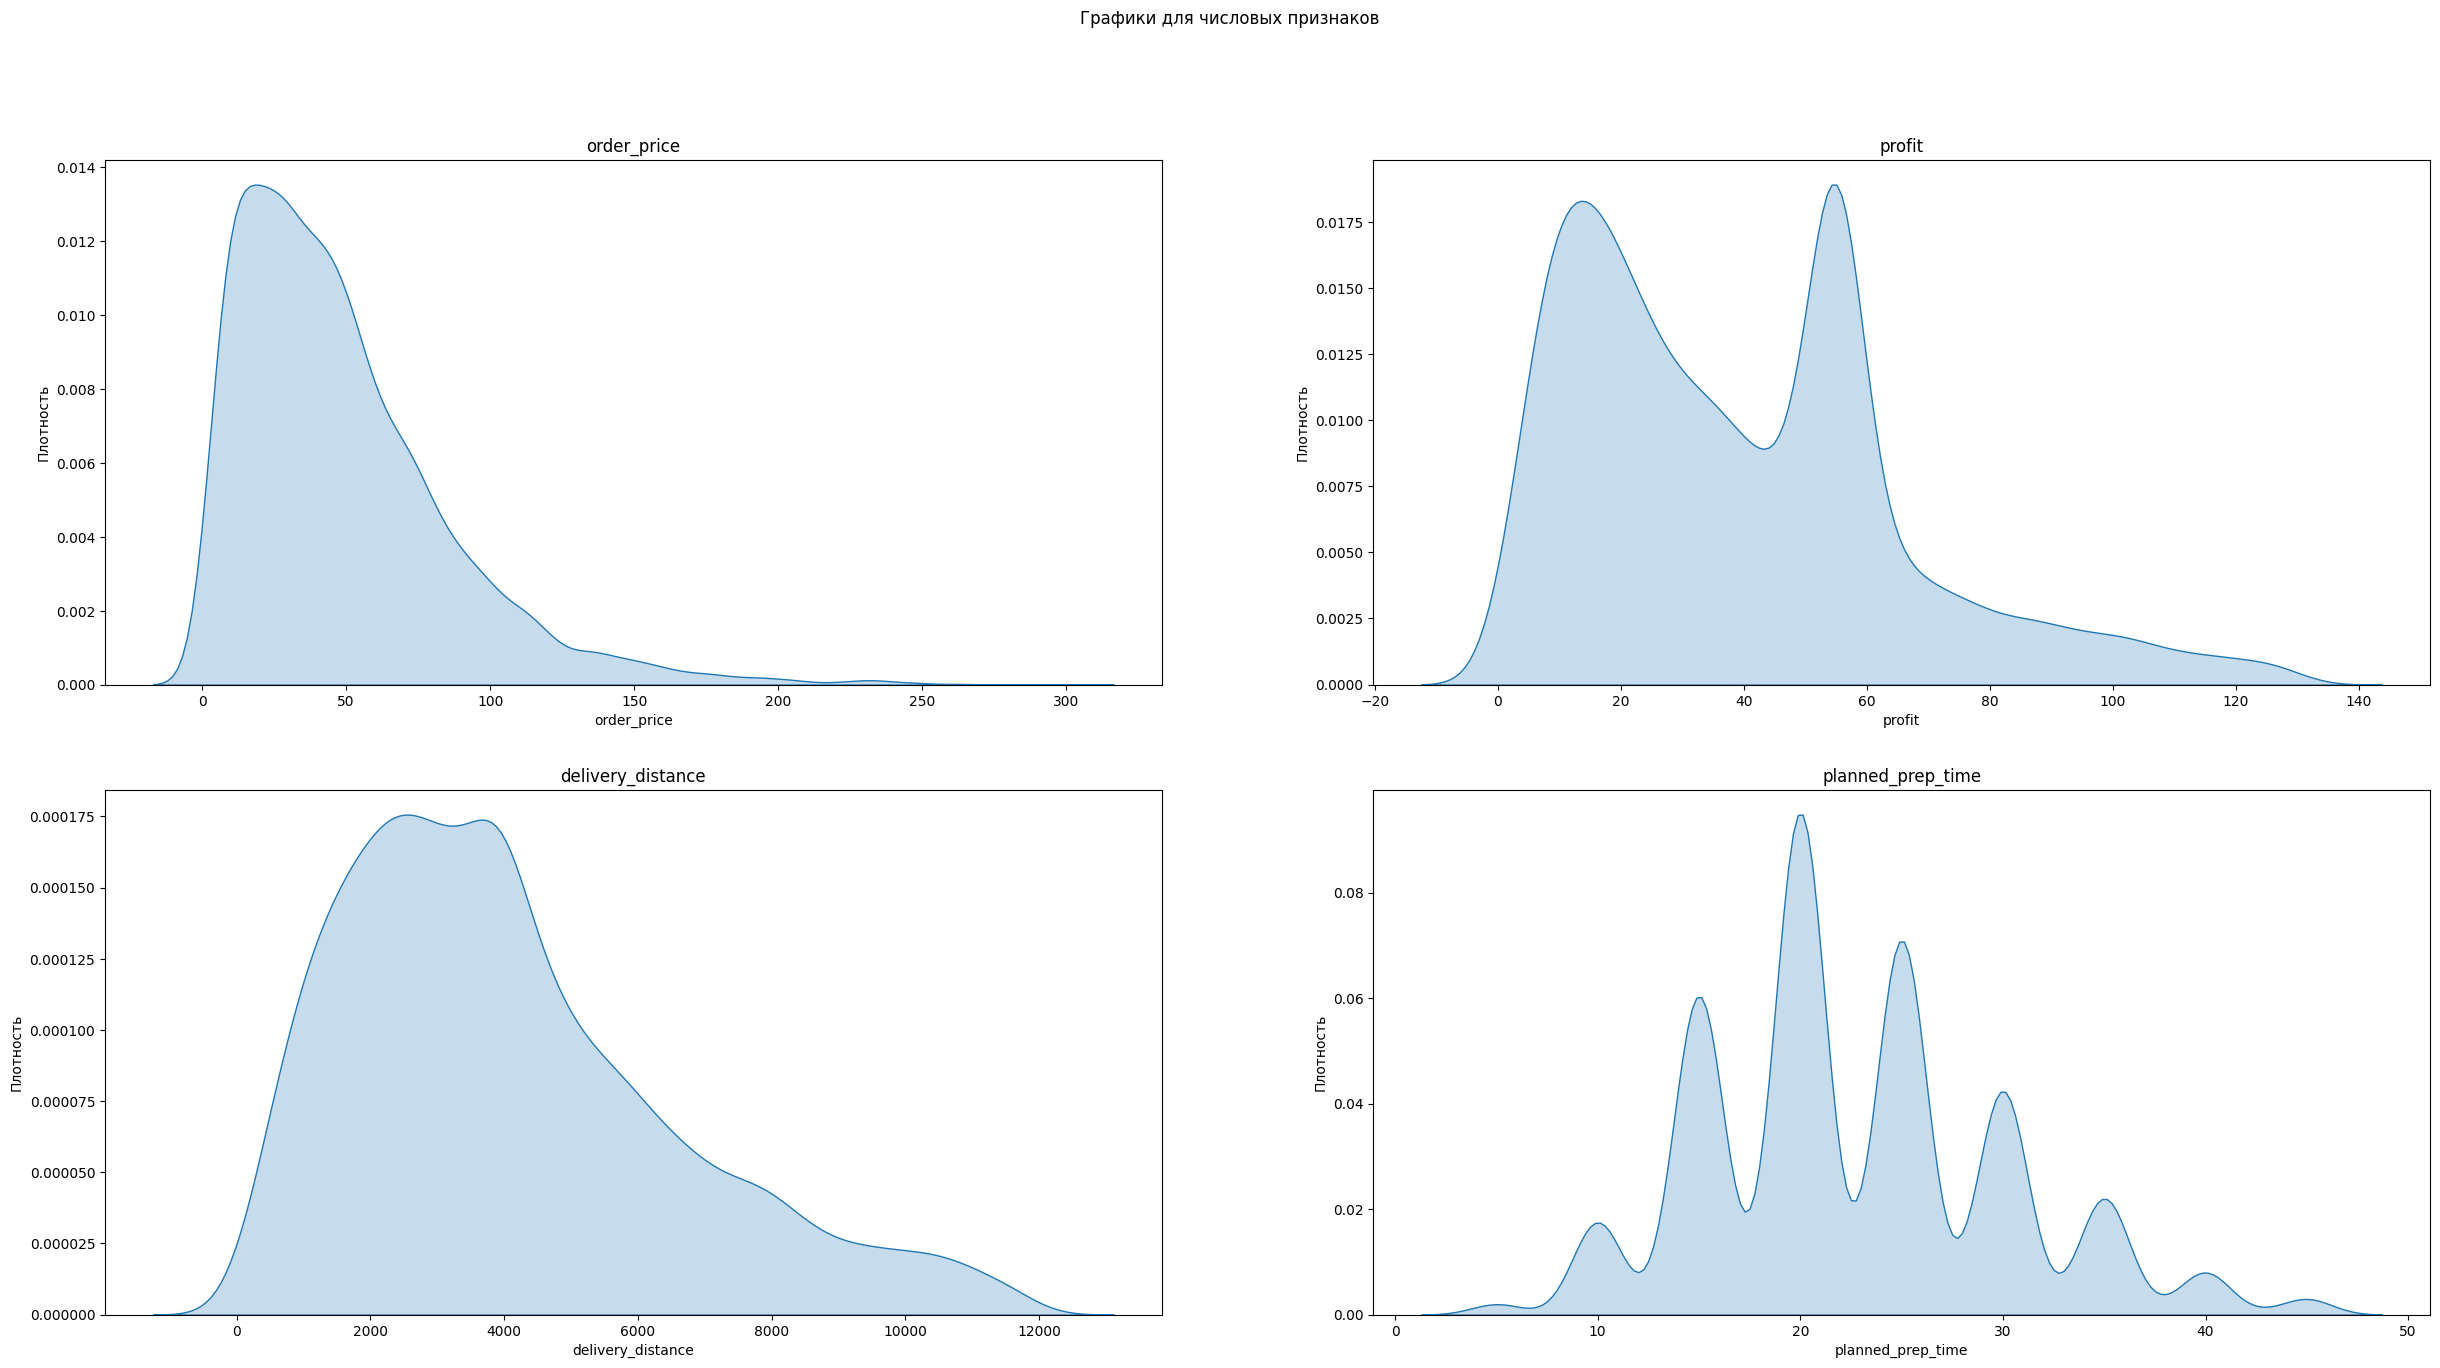

In [30]:
num_df = df[['order_price', 'profit', 'delivery_distance', 'planned_prep_time']]
cat_df = df.drop(columns = num_df.columns)

# гистограммы для категориальных данных
fig = make_subplots(rows = len(cat_df.columns),
                    cols=1,
                    subplot_titles = cat_df.columns.tolist())
row = 1
for col in cat_df.columns:
    fig.add_trace(go.Histogram(x=cat_df[col], name=col), row=row, col=1)
    row += 1

fig.update_layout(height = 400 * len(cat_df.columns),
                  showlegend = False,
                  title_text = 'Гистограммы для категориальных признаков',
                  title_x=0.5)
fig.show()

# графики для числовых данных
plt.figure(figsize=(30, 15))
i = 1
for col in num_df.columns:
  plt.subplot(2,2,i)
  sns.kdeplot(num_df[col], fill=True)
  plt.title(num_df[col].name)
  plt.ylabel('Плотность')
  i += 1

plt.suptitle('Графики для числовых признаков')
plt.show()

#Выводы:


*   Судя по модам гистограмм связанных с созданием, началом и завершением приготовления закахов, пики заказов приходятся на обеденнеое и вечернее время (12:00 - 14:00 и 19:00 - 20:00)

*   Гистограмма *region_index* показала, что большенство заказов делают в Советском районе.

*   Абсолютное большенство заказов имеет статус выполненного.  
*   Можно выделить 2 ресторана: KFC в тц гринвич и KFC на Невском проспекте. На них приходится большинство продаж.


*   БОльшая часть заказов содержит не более 3-ёх продуктов.


*   БОльшая часть заказов пришлась на среду

*   График *planned_prep_time* имеет много мод. это связано с тем что абслоютное большинство значений этого признака кратно 5-ти.

*   График прибыли имеет 2 моды: ~15 и ~58







In [31]:
df = df.drop(['store_name', 'region_name'], axis = 1)

#Шаг 13:
Кодирование цикличных признаков


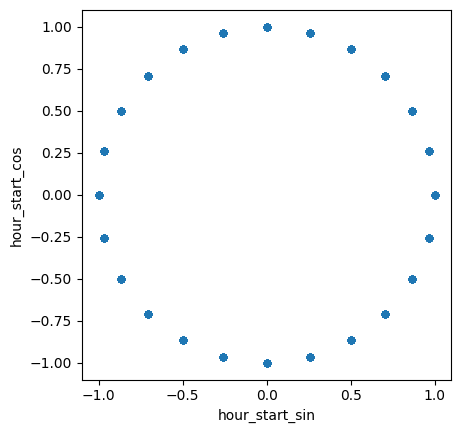

In [32]:
import numpy as np

df['hour_start_sin'] = np.sin(2 * np.pi * df['hour_start'] / 24)
df['hour_start_cos'] = np.cos(2 * np.pi * df['hour_start'] / 24)
df['minutes_start_sin'] = np.sin(2 * np.pi * df['minutes_start'] / 24)
df['minutes_start_cos'] = np.cos(2 * np.pi * df['minutes_start'] / 24)

ax = df.plot.scatter('hour_start_sin', 'hour_start_cos').set_aspect('equal')

#Шаг 14:
Создание целевой переменной *prepared_on_time* (вляется ли фактическое время заказа (*actual_time*) меньше запланированного времени (*planned_prep_time*) + 5 минут).

In [33]:
df['actual_time'] = df['order_ready'] - df['order_start_prepare']
df['prepared_on_time'] = df['actual_time'] <= (pd.to_timedelta(df['planned_prep_time'], unit = 'm') + pd.Timedelta(5, unit = 'm'))
df['prepared_on_time'] = pd.to_numeric(df['prepared_on_time'])

df.drop('actual_time', axis = True, inplace = True)
df.head(5)

,store_id,order_id,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,...,items_count,order_price,day_of_week,hour_start,minutes_start,hour_start_sin,hour_start_cos,minutes_start_sin,minutes_start_cos,prepared_on_time
0,5014,20562761,45.504,2205,2024-09-05 15:25:25,2024-09-05 15:25:33.000000000,15.0,2024-09-05 15:32:00,2024-09-05 16:00:00,683,...,2,30.49,3,15,25,-0.707107,-0.707107,0.258819,0.965926,True
1,3856,20562753,30.336,1368,2024-09-05 15:25:12,2024-09-05 15:25:19.000000000,10.0,2024-09-05 15:35:50,2024-09-05 16:03:50,683,...,2,60.21,3,15,25,-0.707107,-0.707107,0.258819,0.965926,True
2,10825,20562723,43.608,459,2024-09-05 15:23:32,2024-09-05 15:23:44.000000000,20.0,2024-09-05 15:38:38,2024-09-05 16:06:38,683,...,1,8.27,3,15,23,-0.707107,-0.707107,-0.258819,0.965926,True
3,5640,20562673,32.864,2611,2024-09-05 15:19:00,2024-09-05 15:19:05.000000000,20.0,2024-09-05 15:35:25,2024-09-05 16:03:25,709,...,2,24.68,3,15,19,-0.707107,-0.707107,-0.965926,0.258819,True
4,7283,20562665,11.060,1041,2024-09-05 15:18:39,2024-09-05 15:19:09.293065910,15.0,2024-09-05 15:35:33,2024-09-05 16:03:33,707,...,1,14.02,3,15,19,-0.707107,-0.707107,-0.965926,0.258819,True


#Шаг 15:
Посмотреть на баланс классов с помощью value_counts().

In [34]:
df.value_counts()

store_id  order_id  profit     delivery_distance  date_create          order_start_prepare            planned_prep_time  order_ready                    order_pickup         region_id  status_id  items_count  order_price  day_of_week  hour_start  minutes_start  hour_start_sin  hour_start_cos  minutes_start_sin  minutes_start_cos  prepared_on_time
3053      20535945  33.180000  6615               2024-09-03 15:08:25  2024-09-03 15:17:42.000000000  30.0               2024-09-03 15:44:10.000000000  2024-09-03 16:12:10  683        F          3            38.47        1            15          17             -0.707107       -7.071068e-01   -9.659258e-01      -2.588190e-01      True                1
8715      20549625  78.605000  4627               2024-09-04 15:05:24  2024-09-04 15:06:42.000000000  20.0               2024-09-04 15:33:00.000000000  2024-09-04 16:01:00  683        F          3            20.16        2            15          6              -0.707107       -7.071068e-01    1.000000e+00       6.123234e-17      False               1
8717      20544439  10.744000  6852               2024-09-04 03:48:16  2024-09-04 03:48:21.000000000  15.0               2024-09-04 04:05:55.083525794  2024-09-04 04:31:49  683        F          2            38.55        2            3           48              0.707107        7.071068e-01   -4.898587e-16       1.000000e+00      True                1
          20544173  3.081000   4566               2024-09-04 02:38:42  2024-09-04 02:39:01.000000000  20.0               2024-09-04 02:54:02.000000000  2024-09-04 03:22:02  683        F          2            21.91        2            2           39              0.500000        8.660254e-01   -7.071068e-01      -7.071068e-01      True                1
          20544147  5.767000   5286               2024-09-04 02:31:12  2024-09-04 02:31:42.293065910  20.0               2024-09-04 02:41:30.000000000  2024-09-04 03:09:30  683        F          3            43.72        2            2           31              0.500000        8.660254e-01    9.659258e-01      -2.588190e-01      True                1
                                                                                                                                                                                                                                                                                                                                                              ..
4748      20540339  28.440000  2688               2024-09-03 20:10:06  2024-09-03 20:14:23.000000000  20.0               2024-09-03 20:34:07.000000000  2024-09-03 21:02:07  707        F          1            2.77         1            20          14             -0.866025        5.000000e-01   -5.000000e-01      -8.660254e-01      True                1
          20540115  66.755000  3466               2024-09-03 19:49:39  2024-09-03 19:49:45.000000000  20.0               2024-09-03 20:02:44.000000000  2024-09-03 20:30:44  707        F          2            40.17        1            19          49             -0.965926        2.588190e-01    2.588190e-01       9.659258e-01      True                1
          20538641  15.800000  2577               2024-09-03 18:26:17  2024-09-03 18:26:24.000000000  25.0               2024-09-03 18:39:13.000000000  2024-09-03 19:07:13  707        F          4            58.40        1            18          26             -1.000000       -1.836970e-16    5.000000e-01       8.660254e-01      True                1
          20538443  54.920855  7555               2024-09-03 18:12:29  2024-09-03 18:12:59.293065910  15.0               2024-09-03 18:36:05.000000000  2024-09-03 19:04:05  707        F          1            14.18        1            18          12             -1.000000       -1.836970e-16    1.224647e-16      -1.000000e+00      False               1
11963     20547801  35.471000  579                2024-09-04 13:20:34  2024-09-04 13:57:18.000000000  10.0               2

#Шаг 16:
Посчитать корреляцию Пирсона между всеми числовыми признаками и целевой переменной. Также посчитать phi_k корреляцию. Вывести матрицы корреляций в формате heatmap.

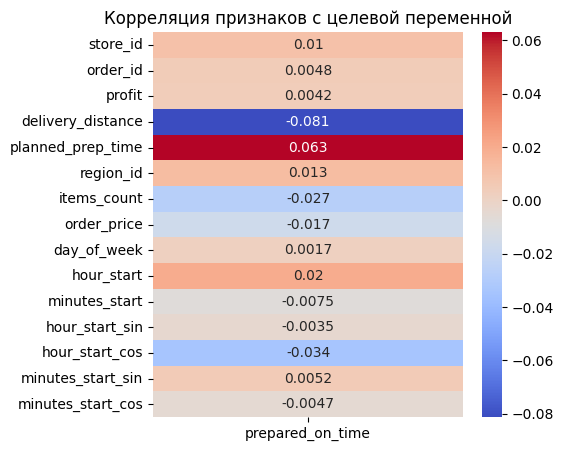

In [35]:
num_df = df.select_dtypes(include=['number']).copy()
num_df = pd.concat([num_df, df[['prepared_on_time']]], axis = 1)
corr_matrix = num_df.corr()

# Извлекаем корреляцию целевой переменной со всеми остальными
target_corr = corr_matrix[['prepared_on_time']].drop('prepared_on_time')  # Удаляем саму целевую переменную

# Построение тепловой карты
plt.figure(figsize=(5, 5))
sns.heatmap(target_corr, annot=True, cmap='coolwarm')
plt.title('Корреляция признаков с целевой переменной')
plt.show()

In [36]:
!pip install phik -q
import phik
from phik.report import plot_correlation_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.5 MB/s eta 0:00:00


interval columns not set, guessing: ['store_id', 'order_id', 'profit', 'delivery_distance', 'planned_prep_time', 'region_id', 'items_count', 'order_price', 'day_of_week', 'hour_start', 'minutes_start', 'hour_start_sin', 'hour_start_cos', 'minutes_start_sin', 'minutes_start_cos']


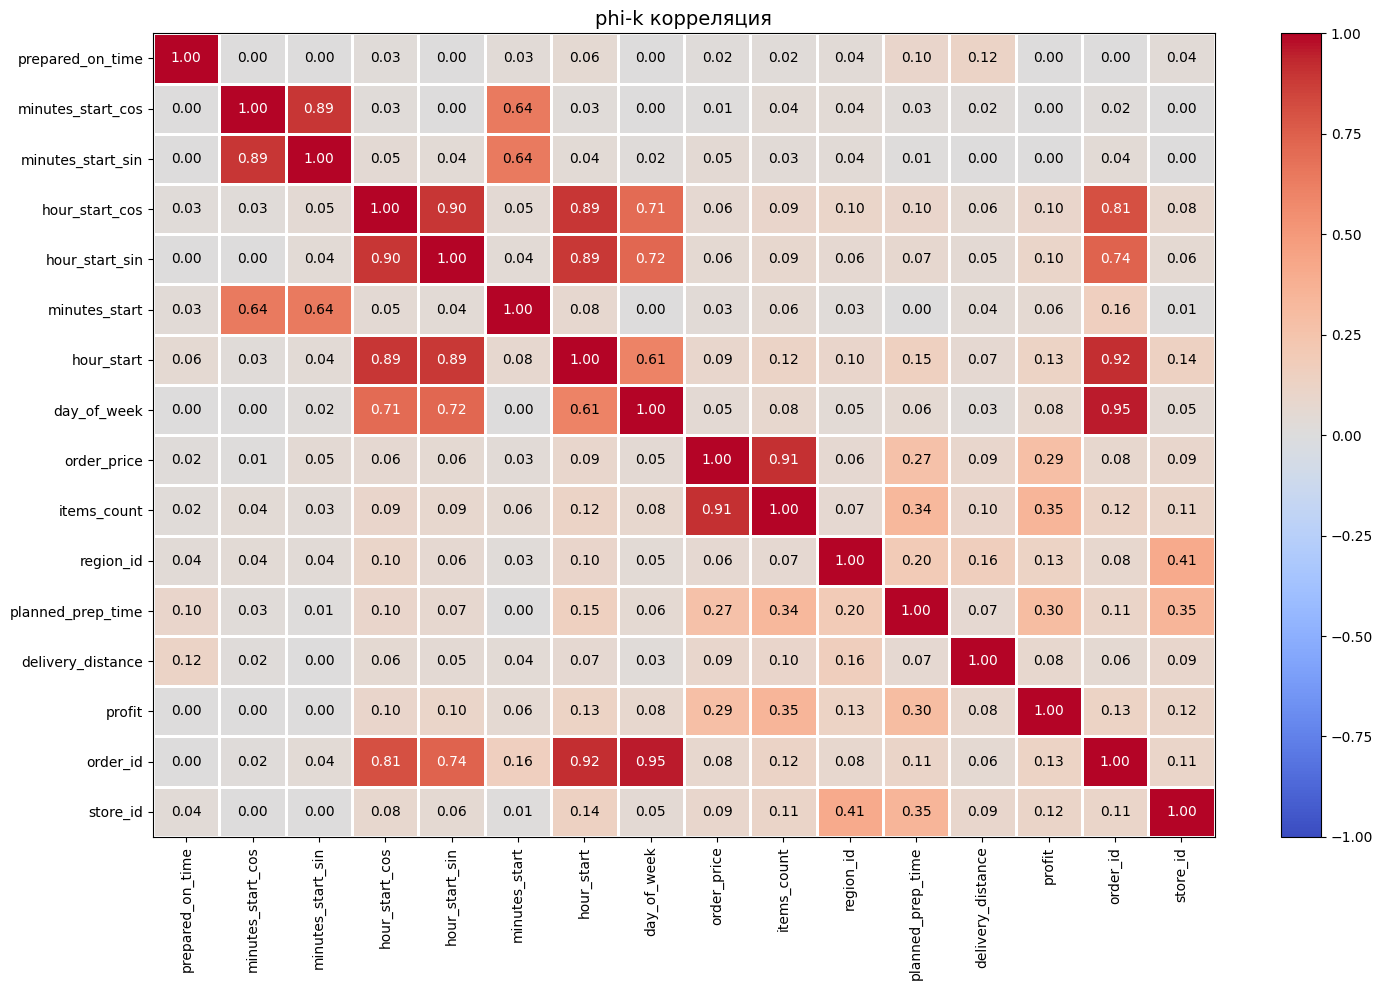

In [37]:
phik_overview = num_df.phik_matrix()
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        color_map='coolwarm',
                        title="phi-k корреляция",
                        figsize=(15, 10))
plt.tight_layout()

Исходя из первой матрицы, наибольшую корреляцию с целевой переменной имеют призника *delivery_distance* и *planned_prep_time*. Матрица phi-k корреляции указывает на корреляцию с теми же признаками, хоть и несущественную.

Сохранение датафрейма с обработанными данными в формате csv.

In [38]:
df_out = df.loc[0:20]

In [39]:
df_out.to_csv(data_path + 'short_ds.csv')